Video: https://www.youtube.com/watch?v=VV3BnroVjZo&list=PLLBUgWXdTBDhrs5FuoJXni-cIeNYEyxw1&index=4


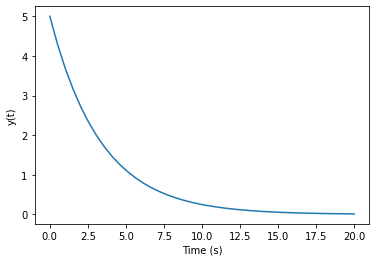

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# RFunction that returns dy / dt


def model(y, t):
    k = 0.3
    dydt = -k * y
    return dydt


# initial condition
y0 = 5

start = 0
finish = 20
number_of_time_points = 40  # Default is 50

# Time points
t = np.linspace(start, finish, number_of_time_points)

# Solve ODE
y = odeint(model, y0, t)

# Plot results
plt.plot(t, y)
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.show()

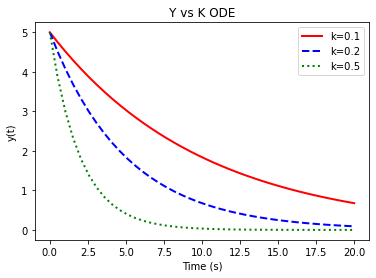

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def model(y, t, k):
    dydt = -k * y
    return dydt


# initial condition
y0 = 5

start = 0
finish = 20
number_of_time_points = 40  # Default is 50

# Time points
t = np.linspace(start, finish, number_of_time_points)

# Solve ODE
k = 0.1
# comma is becuase a tuple expects multiple values
y1 = odeint(model, y0, t, args=(k,))
k = 0.2
y2 = odeint(model, y0, t, args=(k,))
k = 0.5
y3 = odeint(model, y0, t, args=(k,))

# Plot results
plt.plot(t, y1, 'r-', linewidth=2, label='k=0.1')
plt.plot(t, y2, 'b--', linewidth=2, label='k=0.2')
plt.plot(t, y3, 'g:', linewidth=2, label='k=0.5')
plt.title("Y vs K ODE")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.legend(loc='best')
plt.show()


Problem 1:


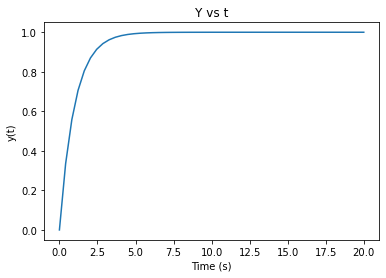

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#dy/dt = -y + 1, y0 = 0

def model(y,t):
    dydt = -y +1.0 #Should make a float
    return dydt

#Variables
start_time = 0
end_time = 20
steps = 50

y0 = 0

#Simulate
t = np.linspace(start_time, end_time, steps)
y = odeint(model, y0, t)

#Plot results
plt.plot(t,y)
plt.title("Y vs t")
plt.xlabel("Time (s)")
plt.ylabel("y(t)")
plt.show()

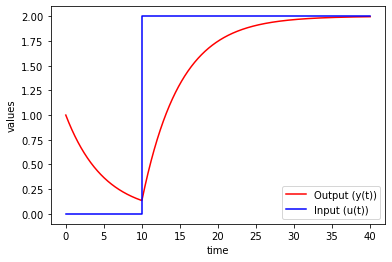

In [12]:
#problem 2
# 5 * (dy/dt) = -y(t) + u(t)
# y(0) = 1
# u(t) goes from 0 to 2 at t = 10

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#dy/dt = -y + 1, y0 = 0

def model(y,t):
    if(t < 10.0):
        u = 0
    else:
        u = 2
    dydt = (-y + u) /5.0
    return dydt

#Variables
start_time = 0
end_time = 40
steps = 1000

y0 = 1

#Simulate
t = np.linspace(start_time, end_time, steps)
y = odeint(model, y0, t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

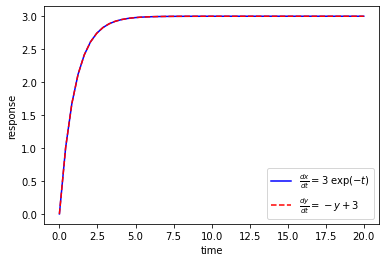

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# time points
t = np.linspace(0,20)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

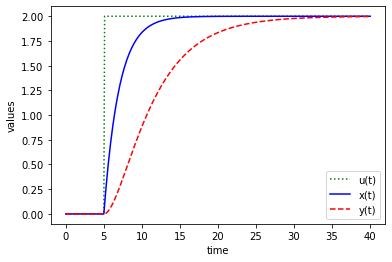

In [22]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1]

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

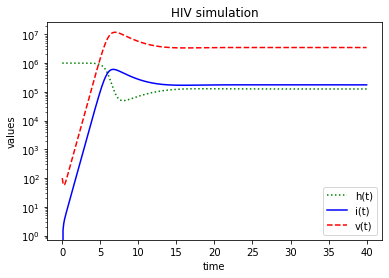

In [33]:
"""
Assignemnt simulate HIV

H(0) = helathy cells = 1,000,000
I(0) = infected cells = 0
V(0) = virus = 100

dHdt = kr1 - kr2*H(t) - kr3 * H(t) * V(t)
dIdt = kr3 * H(t) * V(t) - kr4 * I(t)
dVdt = -kr3 * H(t) * V(t) - kr5 * V(t) + kr6 * I(t)

kr1 = 1e5 = new healthy cells per year
kr2 = 0.1 = death rate of healthy cells
kr3 = 2e-7 = healthy cells converting to infected cells
kr4 = 0.5 = death rate of infected cells
kr5 = 5 = death rate of virus
kr6 = 100 = production of virus by infected cells

"""
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dz/dt
def model(z,t):
    kr1 = 1e5
    kr2 = 0.1
    kr3 = 2e-7
    kr4 = 0.5
    kr5 = 5
    kr6 = 100
    
    h = z[0]
    i = z[1]
    v = z[2]
    
    dhdt = kr1 - kr2*h- kr3*h*v
    didt = kr3*h*v - kr4*i
    dvdt = -kr3*h*v - kr5*v + kr6*i
    
    return [dhdt, didt, dvdt]

# initial condition
z0 = [1000000,0,100]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)


# store solution
h_list = np.empty_like(t)
i_list = np.empty_like(t)
v_list = np.empty_like(t)

# record initial conditions
h_list[0] = z0[0]
i_list[0] = z0[1]
v_list[0] = z0[2]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan)
    # store solution for plotting
    h_list[i] = z[1][0]
    i_list[i] = z[1][1]
    v_list[i] = z[1][2]
    # next initial condition
    z0 = z[1]

# plot results "semi log y plot"
plt.semilogy(t,h_list,'g:',label='h(t)')
plt.semilogy(t,i_list,'b-',label='i(t)')
plt.semilogy(t,v_list,'r--',label='v(t)')
plt.title("HIV simulation")
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()